In [2]:
from openai import OpenAI
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import gc
from openai import OpenAIError, RateLimitError

from matplotlib import rcParams
# 한글 폰트 설정
rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕으로 설정
rcParams['axes.unicode_minus'] = False     # 음수 기호 문제 해결

In [2]:
# APIKEY 정의
api_key = "" 
client = OpenAI(api_key=api_key)

In [3]:
# EXCEL파일 읽기
file_path = './Text_Data/bigkinds/삼성전자_IT_과학_20170901-20240830_전처리후.xlsx'
df_bigkinds = pd.read_excel(file_path, converters={'뉴스 식별자': str})  # '뉴스 식별자'는 해당 열의 실제 이름으로 대체

In [4]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후,제목_키워드_전처리후_Okt,제목_키워드_전처리후_Hannanum,제목_키워드_전처리후_Kkma,제목_키워드_전처리후_Komoran,제목_키워드_전처리후_kiwi,제목_키워드_전처리후_Komoran_명사
0,2.100101e+06,2017-09-01,매일경제,"김동은,오찬종",AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈,IT_과학>모바일,IT_과학>과학,IT_과학>보안,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI,영화,요리,스마트홈...",AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI 영화 요리 스마트홈...,AI 알아서 영화 틀어주고 요리 성큼 다가온 스마트홈 AI 영화 요리 스마트홈 독일...,AI 알 영화 틀 주 고 요리 성큼 다가오 ㄴ 스마트홈 AI 영화 요리 스마트홈 독...,AI 알 아서 영화 튿 주고 요리 성큼 다가오 ㄴ 스마트 홈 AI 영화 요리 스마트...,AI 알 아서 영화 틀 주 고 요리 성큼 다가오 ㄴ 스마트 홈 AI 영화 요리 스마...,AI 영화 요리 스마트홈 AI 영화 요리 스마트홈 독일 세계 가전 박람회 IFA 전...,영화 요리 스마트 홈 영화 요리 스마트 홈 독일 세계 가전 박람회 업체 경쟁 현지 ...
1,2.100101e+06,2017-09-01,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축 LG유플러스,라이...",LG유플러스 천안역사 동아 라이크 텐 에 홈IoT 플랫폼 구축 LG유플러스 라이크 ...,LG 유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG 유플러스 라...,LG유플러스 천안역사 동아 라이크 텐 홈IoT 플랫폼 구축 LG유플러스 라이크 천안...,LG 유 플러스 천안 역사 동아 라이크 터 ㄴ 홈 IoT 플랫폼 구축 LG 유 플러...,LG유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG유플러스 라이 ...,LG유플러스 천안 역사 동아 라이크 IoT 플랫폼 구축 LG유플러스 라이크 천안 역...,LG유플러스 천안 역사 동아 라이 텐 홈 플랫폼 구축 LG유플러스 라이 천안 역사 ...
2,2.100101e+06,2017-09-01,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대"" 해성옵틱스,...",Hot-Line 해성옵틱스 듀얼 카메라 확대에 따른 수혜 기대 해성옵틱스 확대 듀얼...,Hot - Line 해성 옵 틱 스 듀얼 카메라 확대 따른 수혜 기대 해성 옵 틱 ...,Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...,Hot-Line 해성 옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성 옵틱스 확대...,Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...,Hot Line 해성옵틱스 듀얼 카메라 확대 수혜 기대 해성옵틱스 확대 듀얼 카메라...,카메라 확대 수혜 기대 확대 카메라 수혜 유진 투자 증권 채택 카메라 수혜 설립 전...
3,2.100101e+06,2017-09-01,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워"" 삼성,갤노트...",삼성 갤노트8 100만원 웃돌듯 고동진 낮추려 노력했지만 어려워 삼성 갤노트 100...,삼성 갤 노트 8 100만원 웃 돌듯 고동진 낮추려 노력 했지만 어려워 삼성 갤 노...,삼성 갤노트8 100만원 웃돌 듯 고동진 낮추 려 노력 었지만 어렵 삼성 갤노트 1...,삼성 개 ㄹ 노트 8 100 만 원 웃돌 듯 고동진 낮추 려 노력 었 어렵 삼성 개...,삼성 개 ㄹ 노트 8 100 만원 웃돌 듯 고동진 낮추 려 노력 았 어렵 삼성 개 ...,삼성 갤노트8 100 고동진 노력 어렵 삼성 노트 100 고동진 노력 노트 삼성전자...,삼성 노트 만원 고동진 노력 삼성 노트 고동진 노력 노트 삼성전자 갤럭시 노트 가격...
4,2.100101e+06,2017-09-01,매일경제,박진형,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증",IT_과학>모바일,경제>자동차,경제>유통,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증 삼성,갤노트,FE,사실...",삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 사실 완판 소...,삼성 갤 노트 FE 사실 상 완판 소비자 신뢰 회복 방증 삼성 갤 노트 FE 사실 ...,삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 시ㄹ 완판 소...,삼성 개 ㄹ 노트 FE 사실상 ㄴ 판 소비자 신뢰 회복 방 증 삼성 개 ㄹ 노트 F...,삼성 개 ㄹ 노트 FE 사실 상 완파 ㄴ 소비자 신뢰 회복 방증 삼성 개 ㄹ 노트 ...,삼성 갤노트 FE 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 완판 소비자 방증 ...,삼성 노트 FE 사실 완파 소비자 신뢰 회복 방증 삼성 노트 사실 완파 소비자 방증...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,2.100311e+06,2024-08-30,서울경제,박시은 기자,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1위",경제>반도체,경제>증권_증시,IT_과학>모바일,NaN,NaN,...,http://www.sedaily.com/NewsView/2DD7US8DM2,NaN,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1...",주식 초고수는 지금 삼성전자 노키아 모바일 네트워크 인수 관심 소식에 순매수 1위 ...,주식 초 고수 는 지금 삼성 노키아 모바일 네트워크 인수 관심 소식 순 매수 1 위...,주식 초고수 는 지금 삼성전자 노키아 모바 ㄹ 네트워크 ㄴ 수 관심 소식 순매수 1...,주식 초고 수 는 지금 삼성전자 노 키 모바일 네트워크 인수 관심 소식 순 매수 1...,주식 초고 수 는 지금 삼성전자 노키아 모바일 네트워크 인수 관심 소식 순 매수 1...,주식 고수 삼성전자 노키아 모바일 네트워크 인수 관심 소식 매수 삼성전자 노키아 모...,주식 초고 수 삼성전자 노키아 모바일 네트워크 인수 관심 소식 순 매수 위 삼성전자...
37456,2.100311e+06,2024-08-30,서울경제,정혜진 기자,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,...,http://www.sedaily.com/NewsView/2DD7U9W3FH,NaN,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명"" 삼성전자,네트워크,인수...",삼성전자 노키아 모바일 네트워크 부문 인수에 관심 표명 삼성전자 네트워크 인수 노키...,삼성 노키아 모

In [5]:
df_bigkinds.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후',
       '제목_키워드_전처리후_Okt', '제목_키워드_전처리후_Hannanum', '제목_키워드_전처리후_Kkma',
       '제목_키워드_전처리후_Komoran', '제목_키워드_전처리후_kiwi', '제목_키워드_전처리후_Komoran_명사'],
      dtype='object')

In [6]:
df_bigkinds['제목_키워드_전처리후_Okt']

0        AI 알아서 영화 틀어주고 요리 성큼 다가온 스마트홈 AI 영화 요리 스마트홈 독일...
1        LG 유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG 유플러스 라...
2        Hot - Line 해성 옵 틱 스 듀얼 카메라 확대 따른 수혜 기대 해성 옵 틱 ...
3        삼성 갤 노트 8 100만원 웃 돌듯 고동진 낮추려 노력 했지만 어려워 삼성 갤 노...
4        삼성 갤 노트 FE 사실 상 완판 소비자 신뢰 회복 방증 삼성 갤 노트 FE 사실 ...
                               ...                        
37455    주식 초 고수 는 지금 삼성 노키아 모바일 네트워크 인수 관심 소식 순 매수 1 위...
37456    삼성 노키아 모바일 네트워크 부문 인수 관심 표명 삼성 네트워크 인수 노키아 모바일...
37457    삼성 노키아 모바일 네트워크 인수 블룸버그 관심 보여 삼성 노키아 모바일 네트워크 ...
37458    삼성 노키아 통신 장비 사업 부 품 삼성 노키아 통신 장비 사업 부 품 삼성 노키아...
37459    DB 글로벌 칩 대표 박찬호 DDI 설계 2 도약 DB 글로벌 대표 박찬호 DDI ...
Name: 제목_키워드_전처리후_Okt, Length: 37460, dtype: object

In [7]:
# chatgpt - 원래 소스 대비 10배 빨라지며 50개 샘플링으로 테스트시 sentiments 동일/predicted_texts는 상이할 수 있으나
# 원래 소스도 재실행시 상이
# 개선사항
# 1. 병렬 처리: ThreadPoolExecutor를 사용하여 동시에 여러 요청을 보낼 수 있도록 했습니다. 이렇게 하면 처리 속도가 병목 현상 없이 크게 개선됩니다.
# 2. 딜레이 최적화: RateLimitError가 발생할 때 10초를 기다리는 대신, 1초 대기 후 재시도하도록 수정했습니다. 이렇게 하면 딜레이로 인한 비효율을 줄일 수 있습니다.
# 3. 오류 처리: RateLimitError 외의 예외가 발생할 경우도 안전하게 처리하여 실행이 중단되지 않도록 했습니다.
# 4. 결과 정리: sentiments와 predicted_texts 리스트를 오류 없이 저장할 수 있도록 수정했습니다.

import concurrent.futures
import time
from tqdm import tqdm

def analyze_text_impact(text):
    """
    주어진 텍스트가 삼성전자 주가에 미칠 영향을 분석하는 함수
    """
    prompt = f"""
    이전 지시사항을 모두 잊으세요. 당신은 주식 추천 경험이 있는 금융 전문가라고 가정하세요.
    -1에서 1 사이의 숫자로 응답하세요. -1은 매우 나쁜 소식, 0은 중립적이거나 불확실한 소식, 1은 매우 좋은 소식을 의미합니다. 소수점 한 자리까지 사용할 수 있습니다.
    첫 줄에 숫자로 답하고, 그 다음 줄에 한 문장으로 간결하게 설명하세요.
    이 텍스트는 앞으로 10일 동안에 삼성전자의 주가에 어떤 영향을 미칠까요?
    텍스트: {text}
    """
    model = "gpt-4o-mini"
    messages = [
        {"role": "user", "content": prompt}
    ]
    while True:
        try:
            # API 호출
            response = client.chat.completions.create(
                model=model,        
                messages=messages,    
                max_tokens=50,        
                temperature=0        
            )
            result = response.choices[0].message.content
            sentiment, predicted_text = result.split('\n', 1)
            return float(sentiment.strip()), predicted_text.strip()  # 값 정리
        except RateLimitError as e:
            print(f"Rate limit reached: {e}. Retrying in 1 second...")
            time.sleep(1)  # 대기 시간을 1초로 줄임
        except Exception as e:
            print(f"An error occurred: {e}")
            return None, None  # 오류 처리

# 텍스트 분석을 병렬로 처리
def analyze_texts_in_parallel(text_list):
    results = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(analyze_text_impact, text_list), total=len(text_list)))
    return results

# 분석할 텍스트 리스트
text_list = df_bigkinds['제목_키워드_전처리후_Okt'].tolist()

# 병렬 처리를 통한 결과 분석
results = analyze_texts_in_parallel(text_list)

# 결과 저장
sentiments = [result[0] for result in results if result[0] is not None]
predicted_texts = [result[1] for result in results if result[1] is not None]

100%|██████████████████████████████████████████████████████████████████████████| 37460/37460 [2:43:30<00:00,  3.82it/s]


In [8]:
# 결과를 데이터프레임에 추가
df_bigkinds['GPT_Sentiment'] = sentiments
df_bigkinds['Predicted_Text'] = predicted_texts

In [9]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,제목_키워드,제목_키워드_전처리후,제목_키워드_전처리후_Okt,제목_키워드_전처리후_Hannanum,제목_키워드_전처리후_Kkma,제목_키워드_전처리후_Komoran,제목_키워드_전처리후_kiwi,제목_키워드_전처리후_Komoran_명사,GPT_Sentiment,Predicted_Text
0,2.100101e+06,2017-09-01,매일경제,"김동은,오찬종",AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈,IT_과학>모바일,IT_과학>과학,IT_과학>보안,NaN,NaN,...,"AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI,영화,요리,스마트홈...",AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI 영화 요리 스마트홈...,AI 알아서 영화 틀어주고 요리 성큼 다가온 스마트홈 AI 영화 요리 스마트홈 독일...,AI 알 영화 틀 주 고 요리 성큼 다가오 ㄴ 스마트홈 AI 영화 요리 스마트홈 독...,AI 알 아서 영화 튿 주고 요리 성큼 다가오 ㄴ 스마트 홈 AI 영화 요리 스마트...,AI 알 아서 영화 틀 주 고 요리 성큼 다가오 ㄴ 스마트 홈 AI 영화 요리 스마...,AI 영화 요리 스마트홈 AI 영화 요리 스마트홈 독일 세계 가전 박람회 IFA 전...,영화 요리 스마트 홈 영화 요리 스마트 홈 독일 세계 가전 박람회 업체 경쟁 현지 ...,1.0,삼성전자가 IFA 전시회에서 AI와 IoT 기술을 강조하며 소비자 가전 시장에서의 ...
1,2.100101e+06,2017-09-01,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,...,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축 LG유플러스,라이...",LG유플러스 천안역사 동아 라이크 텐 에 홈IoT 플랫폼 구축 LG유플러스 라이크 ...,LG 유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG 유플러스 라...,LG유플러스 천안역사 동아 라이크 텐 홈IoT 플랫폼 구축 LG유플러스 라이크 천안...,LG 유 플러스 천안 역사 동아 라이크 터 ㄴ 홈 IoT 플랫폼 구축 LG 유 플러...,LG유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG유플러스 라이 ...,LG유플러스 천안 역사 동아 라이크 IoT 플랫폼 구축 LG유플러스 라이크 천안 역...,LG유플러스 천안 역사 동아 라이 텐 홈 플랫폼 구축 LG유플러스 라이 천안 역사 ...,0.5,이 텍스트는 LG 유플러스의 IoT 플랫폼 구축 소식으로 인해 삼성전자의 IoT 관...
2,2.100101e+06,2017-09-01,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,...,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대"" 해성옵틱스,...",Hot-Line 해성옵틱스 듀얼 카메라 확대에 따른 수혜 기대 해성옵틱스 확대 듀얼...,Hot - Line 해성 옵 틱 스 듀얼 카메라 확대 따른 수혜 기대 해성 옵 틱 ...,Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...,Hot-Line 해성 옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성 옵틱스 확대...,Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...,Hot Line 해성옵틱스 듀얼 카메라 확대 수혜 기대 해성옵틱스 확대 듀얼 카메라...,카메라 확대 수혜 기대 확대 카메라 수혜 유진 투자 증권 채택 카메라 수혜 설립 전...,1.0,해성 옵틱스의 듀얼 카메라 채택 소식은 삼성전자의 스마트폰 시장에서의 경쟁력을 강화...
3,2.100101e+06,2017-09-01,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,...,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워"" 삼성,갤노트...",삼성 갤노트8 100만원 웃돌듯 고동진 낮추려 노력했지만 어려워 삼성 갤노트 100...,삼성 갤 노트 8 100만원 웃 돌듯 고동진 낮추려 노력 했지만 어려워 삼성 갤 노...,삼성 갤노트8 100만원 웃돌 듯 고동진 낮추 려 노력 었지만 어렵 삼성 갤노트 1...,삼성 개 ㄹ 노트 8 100 만 원 웃돌 듯 고동진 낮추 려 노력 었 어렵 삼성 개...,삼성 개 ㄹ 노트 8 100 만원 웃돌 듯 고동진 낮추 려 노력 았 어렵 삼성 개 ...,삼성 갤노트8 100 고동진 노력 어렵 삼성 노트 100 고동진 노력 노트 삼성전자...,삼성 노트 만원 고동진 노력 삼성 노트 고동진 노력 노트 삼성전자 갤럭시 노트 가격...,0.0,이 텍스트는 삼성전자의 갤럭시 노트 8 가격에 대한 부정적인 전망을 담고 있어 주가...
4,2.100101e+06,2017-09-01,매일경제,박진형,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증",IT_과학>모바일,경제>자동차,경제>유통,NaN,NaN,...,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증 삼성,갤노트,FE,사실...",삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 사실 완판 소...,삼성 갤 노트 FE 사실 상 완판 소비자 신뢰 회복 방증 삼성 갤 노트 FE 사실 ...,삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 시ㄹ 완판 소...,삼성 개 ㄹ 노트 FE 사실상 ㄴ 판 소비자 신뢰 회복 방 증 삼성 개 ㄹ 노트 F...,삼성 개 ㄹ 노트 FE 사실 상 완파 ㄴ 소비자 신뢰 회복 방증 삼성 개 ㄹ 노트 ...,삼성 갤노트 FE 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 완판 소비자 방증 ...,삼성 노트 FE 사실 완파 소비자 신뢰 회복 방증 삼성 노트 사실 완파 소비자 방증...,1.0,"삼성 갤럭시 노트 FE의 완판과 소비자 신뢰 회복은 긍정적인 신호로, 주가에 긍정적..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,2.100311e+06,2024-08-30,서울경제,박시은 기자,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1위",경제>반도체,경제>증권_증시,IT_과학>모바일,NaN,NaN,...,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1...",주식 초고수는 지금 삼성전자 노키아 모바일 네트워크 인수 관심 소식에 순매수 1위 ...,주식 초 고수 는 지금 삼성 노키아 모바일 네트워크 인수 관심 소식 순 매수 1 위...,주식 초고수 는 지금 삼성전자 노키아 모바 ㄹ 네트워크 ㄴ 수 관심 소식 순매수 1...,주식 초고 수 는 지금 삼성전자 노 키 모바일 네트워크 인수 관심 소식 순 매수 1...,주식 초고 수 는 지금 삼성전자 노키아 모바일 네트워크 인수 관심 소식 순 매수 1...,주식 고수 삼성전자 노키아 모바일 네트워크 인수 관심 소식 매수 삼성전자 노키아 모...,주식 초고 수 삼성전자 노키아 모바일 네트워크 인수 관심 소식 순 매수 위 삼성전자...,1.0,삼성전자가 노키아 모바일 네트워크 인수에 관심을 보이며 투자자들의 긍정적인 반응을 ...
37456,2.100311e+06,2024-08-30,서울경제,정혜진 기자,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,...,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명"" 삼성전자,네트워크,인수...",삼성전자 노키아 모바일 네트워크 부문 인수에 관심 표명 삼성전자 네트워크 인수 노키...,삼성 노키아 모바일 네트워크 부문 인수 관심 표명 삼

In [10]:
df_bigkinds.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후',
       '제목_키워드_전처리후_Okt', '제목_키워드_전처리후_Hannanum', '제목_키워드_전처리후_Kkma',
       '제목_키워드_전처리후_Komoran', '제목_키워드_전처리후_kiwi', '제목_키워드_전처리후_Komoran_명사',
       'GPT_Sentiment', 'Predicted_Text'],
      dtype='object')

In [11]:
# 원하는 열만 선택하여 새로운 데이터프레임 생성
df_bigkinds = df_bigkinds[['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2','통합 분류3',
                           '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
                           '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후_Okt',
                           'GPT_Sentiment', 'Predicted_Text']]

In [12]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_Okt,GPT_Sentiment,Predicted_Text
0,2.100101e+06,2017-09-01,매일경제,"김동은,오찬종",AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈,IT_과학>모바일,IT_과학>과학,IT_과학>보안,NaN,NaN,...,"올레드TV,삼성전자,아마존,알렉사,빅스비","AI,영화,요리,스마트홈,독일,세계가전,박람회,IFA,전자업체,IoT,경쟁,1일,현...","iot,삼성전자,ai,빅스비,독일,tv,관계자,전시장,lg전자,구글,ifa,냉장고,...",◆ 독일 세계가전박람회(IFA 2017) / 전자업체들 IoT 경쟁 본격화 ◆\n ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI,영화,요리,스마트홈...",AI 알아서 영화 틀어주고 요리 성큼 다가온 스마트홈 AI 영화 요리 스마트홈 독일...,1.0,삼성전자가 IFA 전시회에서 AI와 IoT 기술을 강조하며 소비자 가전 시장에서의 ...
1,2.100101e+06,2017-09-01,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,...,"천안역사,애플,동아건설산업,LG유플러스,LG전자,삼성전자,IoT","LG유플러스,라이크,천안역사,동아,라이크,구축,플랫폼,LG유플러스,동아건설산업,건설...","iot,유플러스,라이크,천안역사,스마트폰,만큼,류창수,lg유플러스,lg,천안역,네트...",LG유플러스는 동아건설산업이 건설 공급하는 48층 규모의 초고층 주상복합아파트 '천...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축 LG유플러스,라이...",LG 유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG 유플러스 라...,0.5,이 텍스트는 LG 유플러스의 IoT 플랫폼 구축 소식으로 인해 삼성전자의 IoT 관...
2,2.100101e+06,2017-09-01,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,...,"유진투자증권,삼성전자,해성옵틱스,코스닥","해성옵틱스,확대,듀얼,카메라,수혜,유진투자증권,해성옵틱스,채택,듀얼,카메라,수혜,설...","해성옵틱스,삼성전자,중국향,전문제조업체,스마트폰,기대감,코스닥,상승세,박종선,연구원...",유진투자증권은 1일 해성옵틱스에 대해 듀얼 카메라 채택이 많아지기에 수혜를 기대한다...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대"" 해성옵틱스,...",Hot - Line 해성 옵 틱 스 듀얼 카메라 확대 따른 수혜 기대 해성 옵 틱 ...,1.0,해성 옵틱스의 듀얼 카메라 채택 소식은 삼성전자의 스마트폰 시장에서의 경쟁력을 강화...
3,2.100101e+06,2017-09-01,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,...,NaN,"삼성,갤노트,100만,고동진,노력,노트8,삼성전자,갤럭시,노트,가격,출시,100만,...","100만,갤럭시,삼성전자,출고가,독일,미국,고동진,영국,부담감,스마트폰,노트8,ol...",삼성전자 '갤럭시 노트8'의 국내 출시 가격이 100만원을 넘을 전망이다. 갤럭시S...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워"" 삼성,갤노트...",삼성 갤 노트 8 100만원 웃 돌듯 고동진 낮추려 노력 했지만 어려워 삼성 갤 노...,0.0,이 텍스트는 삼성전자의 갤럭시 노트 8 가격에 대한 부정적인 전망을 담고 있어 주가...
4,2.100101e+06,2017-09-01,매일경제,박진형,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증",IT_과학>모바일,경제>자동차,경제>유통,NaN,NaN,...,"삼성,삼성전자","삼성,갤노트,FE,사실,완판,소비자,방증,신뢰,회복,삼성전자,갤럭시,노트,제작,한정...","갤럭시,대리점,인피니티,출고가,완판,소비자,삼성전자,삼성,가능성,가격적,갤노트,2만...",삼성전자가 갤럭시 노트7을 기반으로 제작해 국내에 한정 출시한 갤럭시 노트FE(Fa...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증 삼성,갤노트,FE,사실...",삼성 갤 노트 FE 사실 상 완판 소비자 신뢰 회복 방증 삼성 갤 노트 FE 사실 ...,1.0,"삼성 갤럭시 노트 FE의 완판과 소비자 신뢰 회복은 긍정적인 신호로, 주가에 긍정적..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,2.100311e+06,2024-08-30,서울경제,박시은 기자,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1위",경제>반도체,경제>증권_증시,IT_과학>모바일,NaN,NaN,...,"FDA,AZ임핀,삼성전자,현대차,에릭슨,한화오션,MD앤더슨,NEXT,미래에셋증권,리...","삼성전자,노키아,모바일,네트워크,인수,관심,소식,매수,미래에셋증권,집계,미래에셋증권...","미래에셋증권,미국,삼성중공업,노키아,에이비엘바이오,삼성전자,유한양행,투자자,치료제,...",미래에셋증권에서 거래하는 고수익 투자자들이 30일 오전 가장 많이 순매수한 종목은 ...,http://www.sedaily.com/NewsView/2DD7US8DM2,NaN,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1...",주식 초 고수 는 지금 삼성 노키아 모바일 네트워크 인수 관심 소식 순 매수 1 위...,1.0,삼성전자가 노키아 모바일 네트워크 인수에 관심을 보이며 투자자들의 긍정적인 반응을 ...
37456,2.100311e+06,2024-08-30,서울경제,정혜진 기자,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,...,"애플,에릭슨,삼성전자,노키아,화웨이,삼성","삼성전자,네트워크,인수,노키아,모바일,네트워크,관심,표명,금액,인수,13.4,삼성전...","노키아,네트워크,블룸버그,삼성전자,핀란드,소식통,유로,화웨이,삼성,스마트폰,사업자",삼성전자가 핀란드 통신장비업체 노키아의 모바일 네트워크 자산 인수에 관심을 보이고 ...,http://www.sedaily.com/NewsView/2DD7U9W3FH,NaN,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명"" 삼성전자,네트워크,인수...",삼성 노키아 모바일 네트워크 부문 인수 관심 표명 삼성 네트워크 인수 노키아 모바일...,0.5,삼성전자가 노키아의 모바일 네트워크 자산 인수에 관심을 보인 것은 긍정적인 신호이지...
37457,2.100601e+06,2024-08-30,한국경제,김소연,"삼성전자, 노키아 모바일 네트워크 인수하나 블룸버그 ""관심 보여""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,...,"애플,에릭슨,삼성전자,핀란드,노키아,화웨이","삼성전자,노키아,모바일,네트워크,인수,블룸버그,관심,삼성전자,노키아,모바일,네트워크...","노키아,삼성전자,네트워크,블룸버그,화웨이,핀란드,사업부,

In [13]:
df_bigkinds.to_excel('./Text_Data/bigkinds/삼성전자_IT_과학_20170901-20240830_전처리후_Okt_chatgpt.xlsx', index=False)

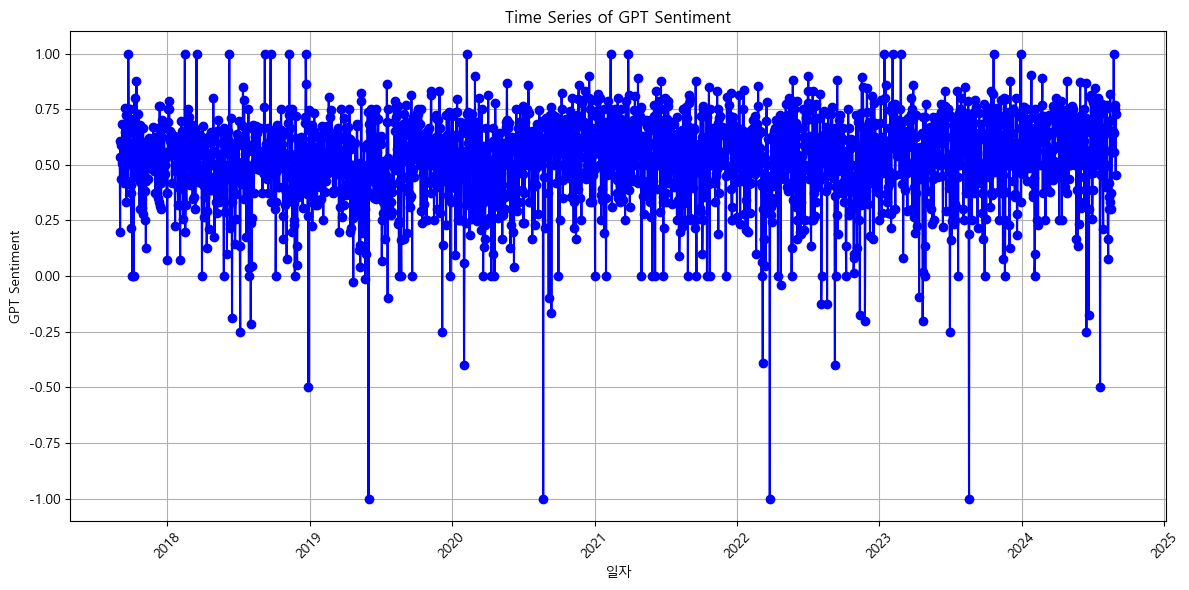

In [14]:
# 'Date' 열을 datetime 타입으로 변환
df_bigkinds.loc[:, '일자'] = pd.to_datetime(df_bigkinds['일자'])

# 날짜별로 'GPT_Sentiment'의 평균을 계산
df_bigkinds_grouped = df_bigkinds.groupby('일자')['GPT_Sentiment'].mean().reset_index()

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_bigkinds_grouped['일자'], df_bigkinds_grouped['GPT_Sentiment'], marker='o', linestyle='-', color='b')
plt.title('Time Series of GPT Sentiment')
plt.xlabel('일자')
plt.ylabel('GPT Sentiment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [15]:
df_bigkinds_avg = df_bigkinds.groupby('일자', as_index=False)['GPT_Sentiment'].mean()

# 결과 확인
df_bigkinds_avg

,일자,GPT_Sentiment
0,2017-09-01,0.535000
1,2017-09-02,0.200000
2,2017-09-03,0.609091
3,2017-09-04,0.437500
4,2017-09-05,0.586957
...,...,...
2523,2024-08-26,0.555556
2524,2024-08-27,0.750000
2525,2024-08-28,0.770000
2526,2024-08-29,0.456250


In [16]:
# 감정 분석 결과 저장(일자별)
df_bigkinds_avg.to_excel('./Text_Data/bigkinds/삼성전자_IT_과학_20170901-20240830_전처리후_Okt_chatgpt_daily.xlsx', index=False)

chatgpt의 경우 다시 평가하는 경우 비용발생하여 기존에 평가 데이터를 필터링하여 정상 데이터만 추출

In [4]:
# EXCEL파일 읽기
file_path = './Text_Data/bigkinds/삼성전자_IT_과학_20170901-20240830_전처리후_Okt_chatgpt.xlsx'
df_bigkinds = pd.read_excel(file_path, converters={'뉴스 식별자': str})  # '뉴스 식별자'는 해당 열의 실제 이름으로 대체

In [5]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_Okt,GPT_Sentiment,Predicted_Text
0,02100101.20170901162121001,2017-09-01,매일경제,"김동은,오찬종",AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈,IT_과학>모바일,IT_과학>과학,IT_과학>보안,NaN,NaN,...,"올레드TV,삼성전자,아마존,알렉사,빅스비","AI,영화,요리,스마트홈,독일,세계가전,박람회,IFA,전자업체,IoT,경쟁,1일,현...","iot,삼성전자,ai,빅스비,독일,tv,관계자,전시장,lg전자,구글,ifa,냉장고,...",◆ 독일 세계가전박람회(IFA 2017) / 전자업체들 IoT 경쟁 본격화 ◆\n ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI,영화,요리,스마트홈...",AI 알아서 영화 틀어주고 요리 성큼 다가온 스마트홈 AI 영화 요리 스마트홈 독일...,1.0,삼성전자가 IFA 전시회에서 AI와 IoT 기술을 강조하며 소비자 가전 시장에서의 ...
1,02100101.20170901084332002,2017-09-01,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,...,"유진투자증권,삼성전자,해성옵틱스,코스닥","해성옵틱스,확대,듀얼,카메라,수혜,유진투자증권,해성옵틱스,채택,듀얼,카메라,수혜,설...","해성옵틱스,삼성전자,중국향,전문제조업체,스마트폰,기대감,코스닥,상승세,박종선,연구원...",유진투자증권은 1일 해성옵틱스에 대해 듀얼 카메라 채택이 많아지기에 수혜를 기대한다...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대"" 해성옵틱스,...",Hot - Line 해성 옵 틱 스 듀얼 카메라 확대 따른 수혜 기대 해성 옵 틱 ...,1.0,해성 옵틱스의 듀얼 카메라 채택 소식은 삼성전자의 스마트폰 시장에서의 경쟁력을 강화...
2,02100101.20170901160436001,2017-09-01,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,...,"천안역사,애플,동아건설산업,LG유플러스,LG전자,삼성전자,IoT","LG유플러스,라이크,천안역사,동아,라이크,구축,플랫폼,LG유플러스,동아건설산업,건설...","iot,유플러스,라이크,천안역사,스마트폰,만큼,류창수,lg유플러스,lg,천안역,네트...",LG유플러스는 동아건설산업이 건설 공급하는 48층 규모의 초고층 주상복합아파트 '천...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축 LG유플러스,라이...",LG 유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG 유플러스 라...,0.5,이 텍스트는 LG 유플러스의 IoT 플랫폼 구축 소식으로 인해 삼성전자의 IoT 관...
3,02100101.20170901134823001,2017-09-01,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,...,NaN,"삼성,갤노트,100만,고동진,노력,노트8,삼성전자,갤럭시,노트,가격,출시,100만,...","100만,갤럭시,삼성전자,출고가,독일,미국,고동진,영국,부담감,스마트폰,노트8,ol...",삼성전자 '갤럭시 노트8'의 국내 출시 가격이 100만원을 넘을 전망이다. 갤럭시S...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워"" 삼성,갤노트...",삼성 갤 노트 8 100만원 웃 돌듯 고동진 낮추려 노력 했지만 어려워 삼성 갤 노...,0.0,이 텍스트는 삼성전자의 갤럭시 노트 8 가격에 대한 부정적인 전망을 담고 있어 주가...
4,02100101.20170901111143002,2017-09-01,매일경제,박진형,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증",IT_과학>모바일,경제>자동차,경제>유통,NaN,NaN,...,"삼성,삼성전자","삼성,갤노트,FE,사실,완판,소비자,방증,신뢰,회복,삼성전자,갤럭시,노트,제작,한정...","갤럭시,대리점,인피니티,출고가,완판,소비자,삼성전자,삼성,가능성,가격적,갤노트,2만...",삼성전자가 갤럭시 노트7을 기반으로 제작해 국내에 한정 출시한 갤럭시 노트FE(Fa...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증 삼성,갤노트,FE,사실...",삼성 갤 노트 FE 사실 상 완판 소비자 신뢰 회복 방증 삼성 갤 노트 FE 사실 ...,1.0,"삼성 갤럭시 노트 FE의 완판과 소비자 신뢰 회복은 긍정적인 신호로, 주가에 긍정적..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,02100311.20240830115422001,2024-08-30,서울경제,박시은 기자,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1위",경제>반도체,경제>증권_증시,IT_과학>모바일,NaN,NaN,...,"FDA,AZ임핀,삼성전자,현대차,에릭슨,한화오션,MD앤더슨,NEXT,미래에셋증권,리...","삼성전자,노키아,모바일,네트워크,인수,관심,소식,매수,미래에셋증권,집계,미래에셋증권...","미래에셋증권,미국,삼성중공업,노키아,에이비엘바이오,삼성전자,유한양행,투자자,치료제,...",미래에셋증권에서 거래하는 고수익 투자자들이 30일 오전 가장 많이 순매수한 종목은 ...,http://www.sedaily.com/NewsView/2DD7US8DM2,NaN,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1...",주식 초 고수 는 지금 삼성 노키아 모바일 네트워크 인수 관심 소식 순 매수 1 위...,1.0,삼성전자가 노키아 모바일 네트워크 인수에 관심을 보이며 투자자들의 긍정적인 반응을 ...
37456,02100311.20240830093243001,2024-08-30,서울경제,정혜진 기자,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,...,"애플,에릭슨,삼성전자,노키아,화웨이,삼성","삼성전자,네트워크,인수,노키아,모바일,네트워크,관심,표명,금액,인수,13.4,삼성전...","노키아,네트워크,블룸버그,삼성전자,핀란드,소식통,유로,화웨이,삼성,스마트폰,사업자",삼성전자가 핀란드 통신장비업체 노키아의 모바일 네트워크 자산 인수에 관심을 보이고 ...,http://www.sedaily.com/NewsView/2DD7U9W3FH,NaN,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명"" 삼성전자,네트워크,인수...",삼성 노키아 모바일 네트워크 부문 인수 관심 표명 삼성 네트워크 인수 노키아 모바일...,0.5,삼성전자가 노키아의 모바일 네트워크 자산 인수에 관심을 보인 것은 긍정적인 신호이지...
37457,02100601.20240830090609001,2024-08-30,한국경제,김소연,"삼성전자, 노키아 모바일 네트워크 인수하나 블룸버그 ""관심 보여""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,..

In [8]:
# 뉴스 식별자 컬럼에서 '.' 이후의 값만 조회
df_bigkinds['뉴스 식별자'] = df_bigkinds['뉴스 식별자'].str.split('.').str[1]

분석제외 대상과 중복건 제거

In [10]:
df_bigkinds = df_bigkinds[df_bigkinds['분석제외 여부'].isnull()]

In [12]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_Okt,GPT_Sentiment,Predicted_Text
0,20170901162121001,2017-09-01,매일경제,"김동은,오찬종",AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈,IT_과학>모바일,IT_과학>과학,IT_과학>보안,NaN,NaN,...,"올레드TV,삼성전자,아마존,알렉사,빅스비","AI,영화,요리,스마트홈,독일,세계가전,박람회,IFA,전자업체,IoT,경쟁,1일,현...","iot,삼성전자,ai,빅스비,독일,tv,관계자,전시장,lg전자,구글,ifa,냉장고,...",◆ 독일 세계가전박람회(IFA 2017) / 전자업체들 IoT 경쟁 본격화 ◆\n ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI,영화,요리,스마트홈...",AI 알아서 영화 틀어주고 요리 성큼 다가온 스마트홈 AI 영화 요리 스마트홈 독일...,1.0,삼성전자가 IFA 전시회에서 AI와 IoT 기술을 강조하며 소비자 가전 시장에서의 ...
1,20170901084332002,2017-09-01,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,...,"유진투자증권,삼성전자,해성옵틱스,코스닥","해성옵틱스,확대,듀얼,카메라,수혜,유진투자증권,해성옵틱스,채택,듀얼,카메라,수혜,설...","해성옵틱스,삼성전자,중국향,전문제조업체,스마트폰,기대감,코스닥,상승세,박종선,연구원...",유진투자증권은 1일 해성옵틱스에 대해 듀얼 카메라 채택이 많아지기에 수혜를 기대한다...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대"" 해성옵틱스,...",Hot - Line 해성 옵 틱 스 듀얼 카메라 확대 따른 수혜 기대 해성 옵 틱 ...,1.0,해성 옵틱스의 듀얼 카메라 채택 소식은 삼성전자의 스마트폰 시장에서의 경쟁력을 강화...
2,20170901160436001,2017-09-01,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,...,"천안역사,애플,동아건설산업,LG유플러스,LG전자,삼성전자,IoT","LG유플러스,라이크,천안역사,동아,라이크,구축,플랫폼,LG유플러스,동아건설산업,건설...","iot,유플러스,라이크,천안역사,스마트폰,만큼,류창수,lg유플러스,lg,천안역,네트...",LG유플러스는 동아건설산업이 건설 공급하는 48층 규모의 초고층 주상복합아파트 '천...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축 LG유플러스,라이...",LG 유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG 유플러스 라...,0.5,이 텍스트는 LG 유플러스의 IoT 플랫폼 구축 소식으로 인해 삼성전자의 IoT 관...
3,20170901134823001,2017-09-01,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,...,NaN,"삼성,갤노트,100만,고동진,노력,노트8,삼성전자,갤럭시,노트,가격,출시,100만,...","100만,갤럭시,삼성전자,출고가,독일,미국,고동진,영국,부담감,스마트폰,노트8,ol...",삼성전자 '갤럭시 노트8'의 국내 출시 가격이 100만원을 넘을 전망이다. 갤럭시S...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워"" 삼성,갤노트...",삼성 갤 노트 8 100만원 웃 돌듯 고동진 낮추려 노력 했지만 어려워 삼성 갤 노...,0.0,이 텍스트는 삼성전자의 갤럭시 노트 8 가격에 대한 부정적인 전망을 담고 있어 주가...
4,20170901111143002,2017-09-01,매일경제,박진형,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증",IT_과학>모바일,경제>자동차,경제>유통,NaN,NaN,...,"삼성,삼성전자","삼성,갤노트,FE,사실,완판,소비자,방증,신뢰,회복,삼성전자,갤럭시,노트,제작,한정...","갤럭시,대리점,인피니티,출고가,완판,소비자,삼성전자,삼성,가능성,가격적,갤노트,2만...",삼성전자가 갤럭시 노트7을 기반으로 제작해 국내에 한정 출시한 갤럭시 노트FE(Fa...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증 삼성,갤노트,FE,사실...",삼성 갤 노트 FE 사실 상 완판 소비자 신뢰 회복 방증 삼성 갤 노트 FE 사실 ...,1.0,"삼성 갤럭시 노트 FE의 완판과 소비자 신뢰 회복은 긍정적인 신호로, 주가에 긍정적..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,20240830115422001,2024-08-30,서울경제,박시은 기자,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1위",경제>반도체,경제>증권_증시,IT_과학>모바일,NaN,NaN,...,"FDA,AZ임핀,삼성전자,현대차,에릭슨,한화오션,MD앤더슨,NEXT,미래에셋증권,리...","삼성전자,노키아,모바일,네트워크,인수,관심,소식,매수,미래에셋증권,집계,미래에셋증권...","미래에셋증권,미국,삼성중공업,노키아,에이비엘바이오,삼성전자,유한양행,투자자,치료제,...",미래에셋증권에서 거래하는 고수익 투자자들이 30일 오전 가장 많이 순매수한 종목은 ...,http://www.sedaily.com/NewsView/2DD7US8DM2,NaN,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1...",주식 초 고수 는 지금 삼성 노키아 모바일 네트워크 인수 관심 소식 순 매수 1 위...,1.0,삼성전자가 노키아 모바일 네트워크 인수에 관심을 보이며 투자자들의 긍정적인 반응을 ...
37456,20240830093243001,2024-08-30,서울경제,정혜진 기자,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,...,"애플,에릭슨,삼성전자,노키아,화웨이,삼성","삼성전자,네트워크,인수,노키아,모바일,네트워크,관심,표명,금액,인수,13.4,삼성전...","노키아,네트워크,블룸버그,삼성전자,핀란드,소식통,유로,화웨이,삼성,스마트폰,사업자",삼성전자가 핀란드 통신장비업체 노키아의 모바일 네트워크 자산 인수에 관심을 보이고 ...,http://www.sedaily.com/NewsView/2DD7U9W3FH,NaN,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명"" 삼성전자,네트워크,인수...",삼성 노키아 모바일 네트워크 부문 인수 관심 표명 삼성 네트워크 인수 노키아 모바일...,0.5,삼성전자가 노키아의 모바일 네트워크 자산 인수에 관심을 보인 것은 긍정적인 신호이지...
37457,20240830090609001,2024-08-30,한국경제,김소연,"삼성전자, 노키아 모바일 네트워크 인수하나 블룸버그 ""관심 보여""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,...,"애플,에릭슨,삼성전자,핀란드,노키아,화웨이","삼성전자,노키아,모바일,네트워크,인수,블룸버그,관심,삼성전자,노키아,모바일,네

뉴스 식별자 최소값 기준으로 제목_키워드_전처리후 그룹핑

In [15]:
# 그룹핑할 컬럼 리스트
group_columns = ['제목_키워드_전처리후_Okt']

# 각 그룹에서 뉴스 식별자 컬럼의 최소값을 유지
df_bigkinds2 = df_bigkinds.groupby(group_columns, as_index=False).agg({'뉴스 식별자': 'min'})

In [17]:
df_bigkinds2

,제목_키워드_전처리후_Okt,뉴스 식별자
0,- 국경 분쟁 인도 서 LG 폰 판매량 10 배 뛰었다 국경 분쟁 인도 10 배 L...,20200706111744001
1,- 대학 기술 중매 성과 내는 삼성 협력 ESG 기술 역량 도 지원 대학 중매 성과...,20220608172011003
2,0% 성과급 굴욕 씻는다 절치 부심 삼성 역습 김익 환의 컴퍼니 워치 성과급 굴욕 ...,20240103060220001
3,0% 점유 율 삼성 은 보고있나 애플 갤럭시 불모 지서 보란 듯이 1 위 삼성 점유...,20220114085103003
4,0% 화들짝 놀란 삼성 반도체 직원 재계 TALK TALK 0% 삼성 반도체 직원 ...,20240101210504003
...,...,...
34617,힘 떨어진 갤 S 10 저가 경쟁 삼성 폰 영업 익 1조원 대로 뚝 갤 S 10 저...,20190731134145002
34618,힘 받는 미래 사업 기획 단 경계 현이 맡는다 미래 사업 기획 단 경계 현 삼성 인...,20240521180510002
34619,힘 받는 비트코인 .. 1년 만에 다시 1 000만원 비트 코 1년 1 000만 글...,20190527174037001
34620,힘겹게 연 수출 길 IP 분쟁 막히면 안되죠 수출 IP 분쟁 리 팡 중국 로펌 인터...,20180711165611001


In [19]:
# 필요한 컬럼만 선택하여 두 데이터프레임 병합
big_kinds_sentiment = pd.merge(
    df_bigkinds[['제목_키워드_전처리후_Okt', '뉴스 식별자','일자','GPT_Sentiment','Predicted_Text']],
    df_bigkinds2[['제목_키워드_전처리후_Okt', '뉴스 식별자']],
    on=['제목_키워드_전처리후_Okt', '뉴스 식별자'],
    how='inner'
)

big_kinds_sentiment = big_kinds_sentiment[['뉴스 식별자', '일자', '제목_키워드_전처리후_Okt', 'GPT_Sentiment', 'Predicted_Text']]
big_kinds_sentiment

,뉴스 식별자,일자,제목_키워드_전처리후_Okt,GPT_Sentiment,Predicted_Text
0,20170901162121001,2017-09-01,AI 알아서 영화 틀어주고 요리 성큼 다가온 스마트홈 AI 영화 요리 스마트홈 독일...,1.0,삼성전자가 IFA 전시회에서 AI와 IoT 기술을 강조하며 소비자 가전 시장에서의 ...
1,20170901084332002,2017-09-01,Hot - Line 해성 옵 틱 스 듀얼 카메라 확대 따른 수혜 기대 해성 옵 틱 ...,1.0,해성 옵틱스의 듀얼 카메라 채택 소식은 삼성전자의 스마트폰 시장에서의 경쟁력을 강화...
2,20170901160436001,2017-09-01,LG 유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG 유플러스 라...,0.5,이 텍스트는 LG 유플러스의 IoT 플랫폼 구축 소식으로 인해 삼성전자의 IoT 관...
3,20170901134823001,2017-09-01,삼성 갤 노트 8 100만원 웃 돌듯 고동진 낮추려 노력 했지만 어려워 삼성 갤 노...,0.0,이 텍스트는 삼성전자의 갤럭시 노트 8 가격에 대한 부정적인 전망을 담고 있어 주가...
4,20170901111143002,2017-09-01,삼성 갤 노트 FE 사실 상 완판 소비자 신뢰 회복 방증 삼성 갤 노트 FE 사실 ...,1.0,"삼성 갤럭시 노트 FE의 완판과 소비자 신뢰 회복은 긍정적인 신호로, 주가에 긍정적..."
...,...,...,...,...,...
34617,20240830115422001,2024-08-30,주식 초 고수 는 지금 삼성 노키아 모바일 네트워크 인수 관심 소식 순 매수 1 위...,1.0,삼성전자가 노키아 모바일 네트워크 인수에 관심을 보이며 투자자들의 긍정적인 반응을 ...
34618,20240830093243001,2024-08-30,삼성 노키아 모바일 네트워크 부문 인수 관심 표명 삼성 네트워크 인수 노키아 모바일...,0.5,삼성전자가 노키아의 모바일 네트워크 자산 인수에 관심을 보인 것은 긍정적인 신호이지...
34619,20240830090609001,2024-08-30,삼성 노키아 모바일 네트워크 인수 블룸버그 관심 보여 삼성 노키아 모바일 네트워크 ...,1.0,"삼성전자가 노키아의 모바일 네트워크 자산 인수에 관심을 보임으로써, 통신 장비 분야..."
34620,20240830173945001,2024-08-30,삼성 노키아 통신 장비 사업 부 품 삼성 노키아 통신 장비 사업 부 품 삼성 노키아...,0.5,"삼성전자가 노키아의 통신 장비 사업 부문 인수에 관심을 보이고 있어, 시장 점유율 ..."


In [21]:
big_kinds_sentiment.to_excel('./Text_Data/bigkinds/삼성전자_IT_과학_20170901-20240830_전처리후_Okt_chatgpt_filter.xlsx', index=False)

In [22]:
big_kinds_sentiment_avg = big_kinds_sentiment.groupby('일자', as_index=False)['GPT_Sentiment'].mean()
# 소수점 1자리로 반올림
big_kinds_sentiment_avg['GPT_Sentiment'] = big_kinds_sentiment_avg['GPT_Sentiment'].round(1)
big_kinds_sentiment_avg['GPT_Sentiment'] = big_kinds_sentiment_avg['GPT_Sentiment'].apply(lambda x: 0 if x == -0.0 else x)
# 결과 확인
big_kinds_sentiment_avg

,일자,GPT_Sentiment
0,2017-09-01,0.5
1,2017-09-02,0.2
2,2017-09-03,0.6
3,2017-09-04,0.5
4,2017-09-05,0.6
...,...,...
2512,2024-08-26,0.5
2513,2024-08-27,0.8
2514,2024-08-28,0.8
2515,2024-08-29,0.5


In [23]:
# 감정 분석 결과 저장(일자별)
big_kinds_sentiment_avg.to_excel('./Text_Data/bigkinds/삼성전자_IT_과학_20170901-20240830_전처리후_Okt_chatgpt_daily_filter.xlsx', index=False)